In [52]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install scikit-learn
# !pip install missingno

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


Import the dataset

In [54]:
df = pd.read_csv('./Heart_health.csv')

In [55]:
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


In [56]:
df.describe()

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,361.712707,44.842541,171.161602,75.610497,206.022099,92.179558,2.770718,0.599448
std,207.901609,8.162429,6.242018,6.368595,11.224704,4.662712,0.934907,0.490349
min,1.000000,30.000000,155.000000,60.000000,170.000000,75.000000,1.000000,0.000000
25%,181.750000,38.000000,166.000000,71.000000,195.000000,88.000000,2.000000,0.000000
50%,362.500000,44.000000,170.000000,75.000000,210.000000,92.000000,3.000000,1.000000
75%,543.250000,53.000000,177.000000,81.000000,215.000000,96.000000,4.000000,1.000000
max,714.000000,60.000000,183.000000,89.000000,230.000000,100.000000,4.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


In [58]:
df.shape

(724, 12)

In [59]:
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Height(cm)', 'Weight(kg)',
       'Blood Pressure(mmHg)', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)',
       'Smoker', 'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')

In [60]:
numerical_df_list = df.select_dtypes(include='number')
categorical_df_list = df.select_dtypes(include=['object'])

In [61]:
#categorical columns
categorical_df_list.columns

Index(['Name', 'Gender', 'Blood Pressure(mmHg)', 'Smoker'], dtype='object')

In [62]:
numerical_df_list.columns

Index(['ID', 'Age', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)',
       'Glucose(mg/dL)', 'Exercise(hours/week)', 'Heart Attack'],
      dtype='object')

Visualize Missing Data

<Axes: >

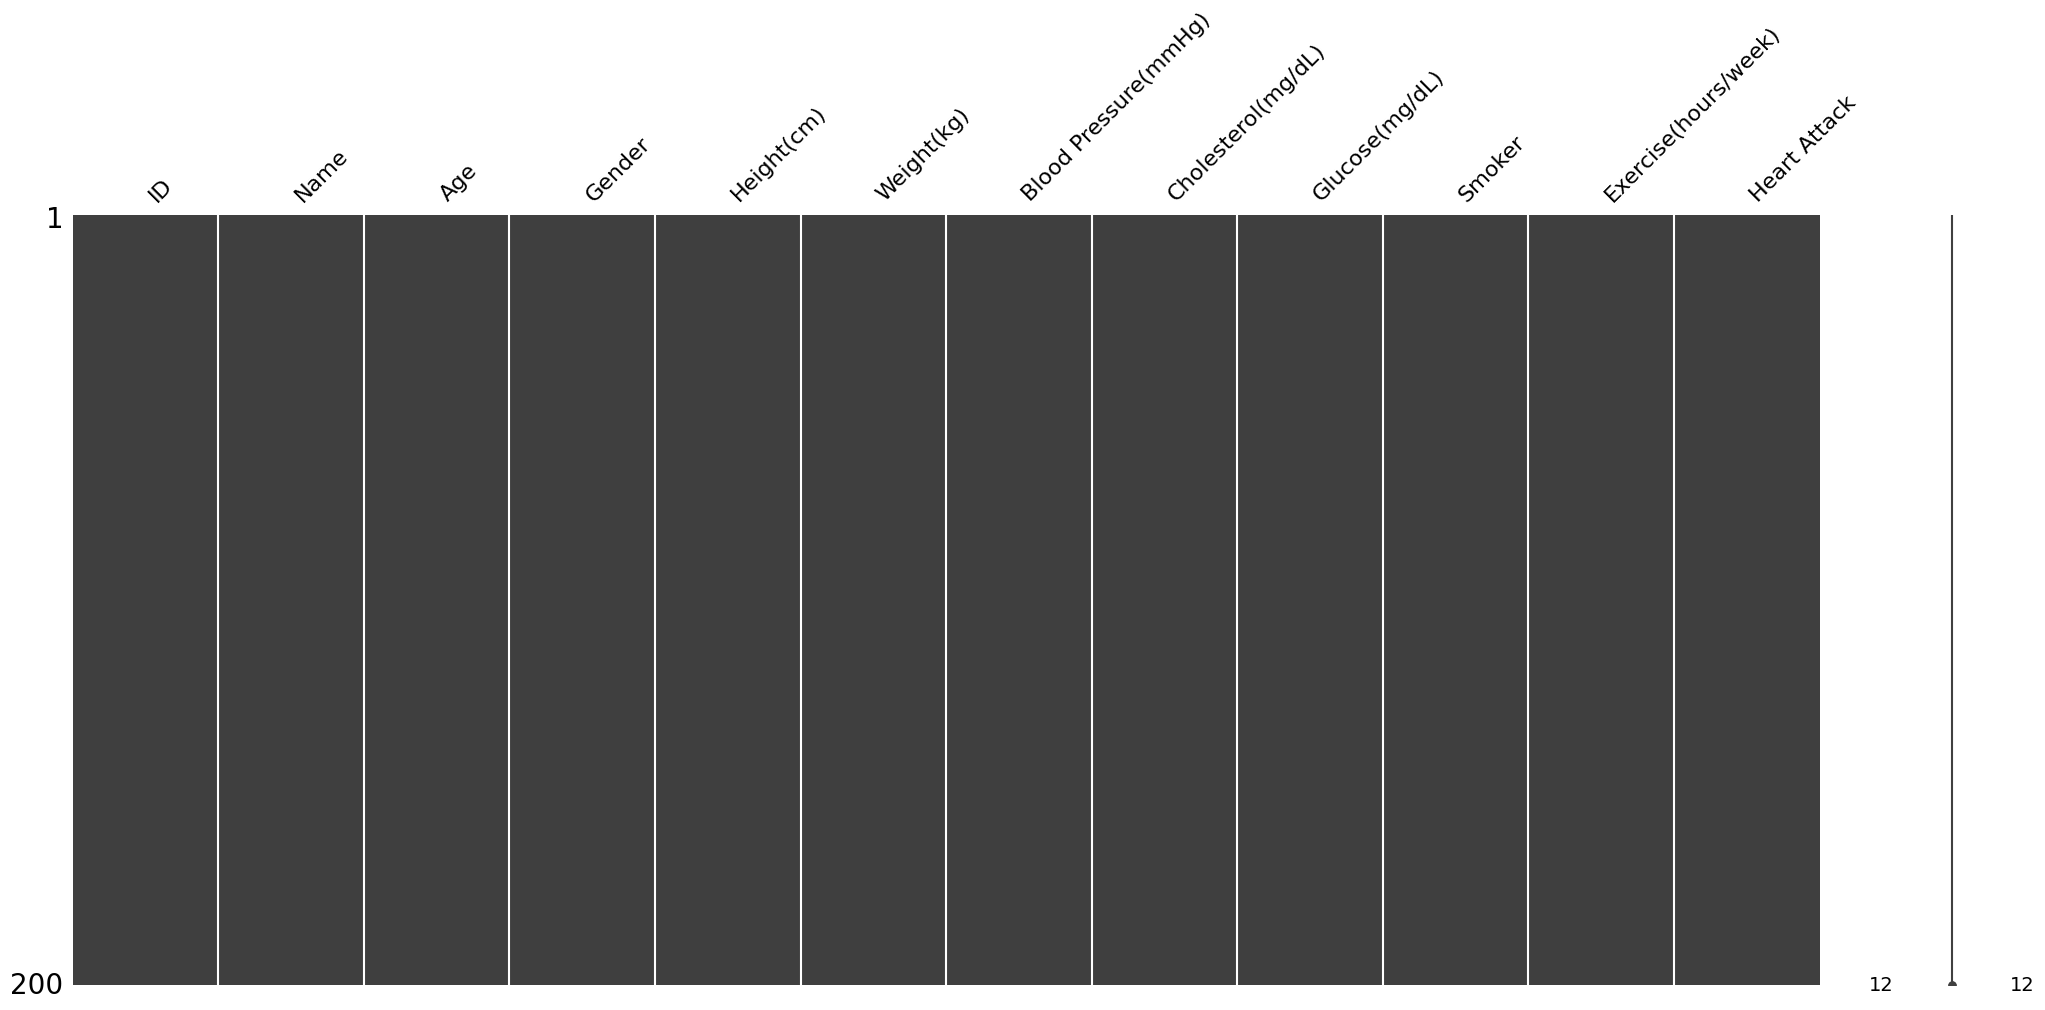

In [63]:
import missingno as msno
msno.matrix(df.sample(200))

In [64]:
df.isnull().sum()

ID                      0
Name                    0
Age                     0
Gender                  0
Height(cm)              0
Weight(kg)              0
Blood Pressure(mmHg)    0
Cholesterol(mg/dL)      0
Glucose(mg/dL)          0
Smoker                  0
Exercise(hours/week)    0
Heart Attack            0
dtype: int64

No missing data

<Axes: >

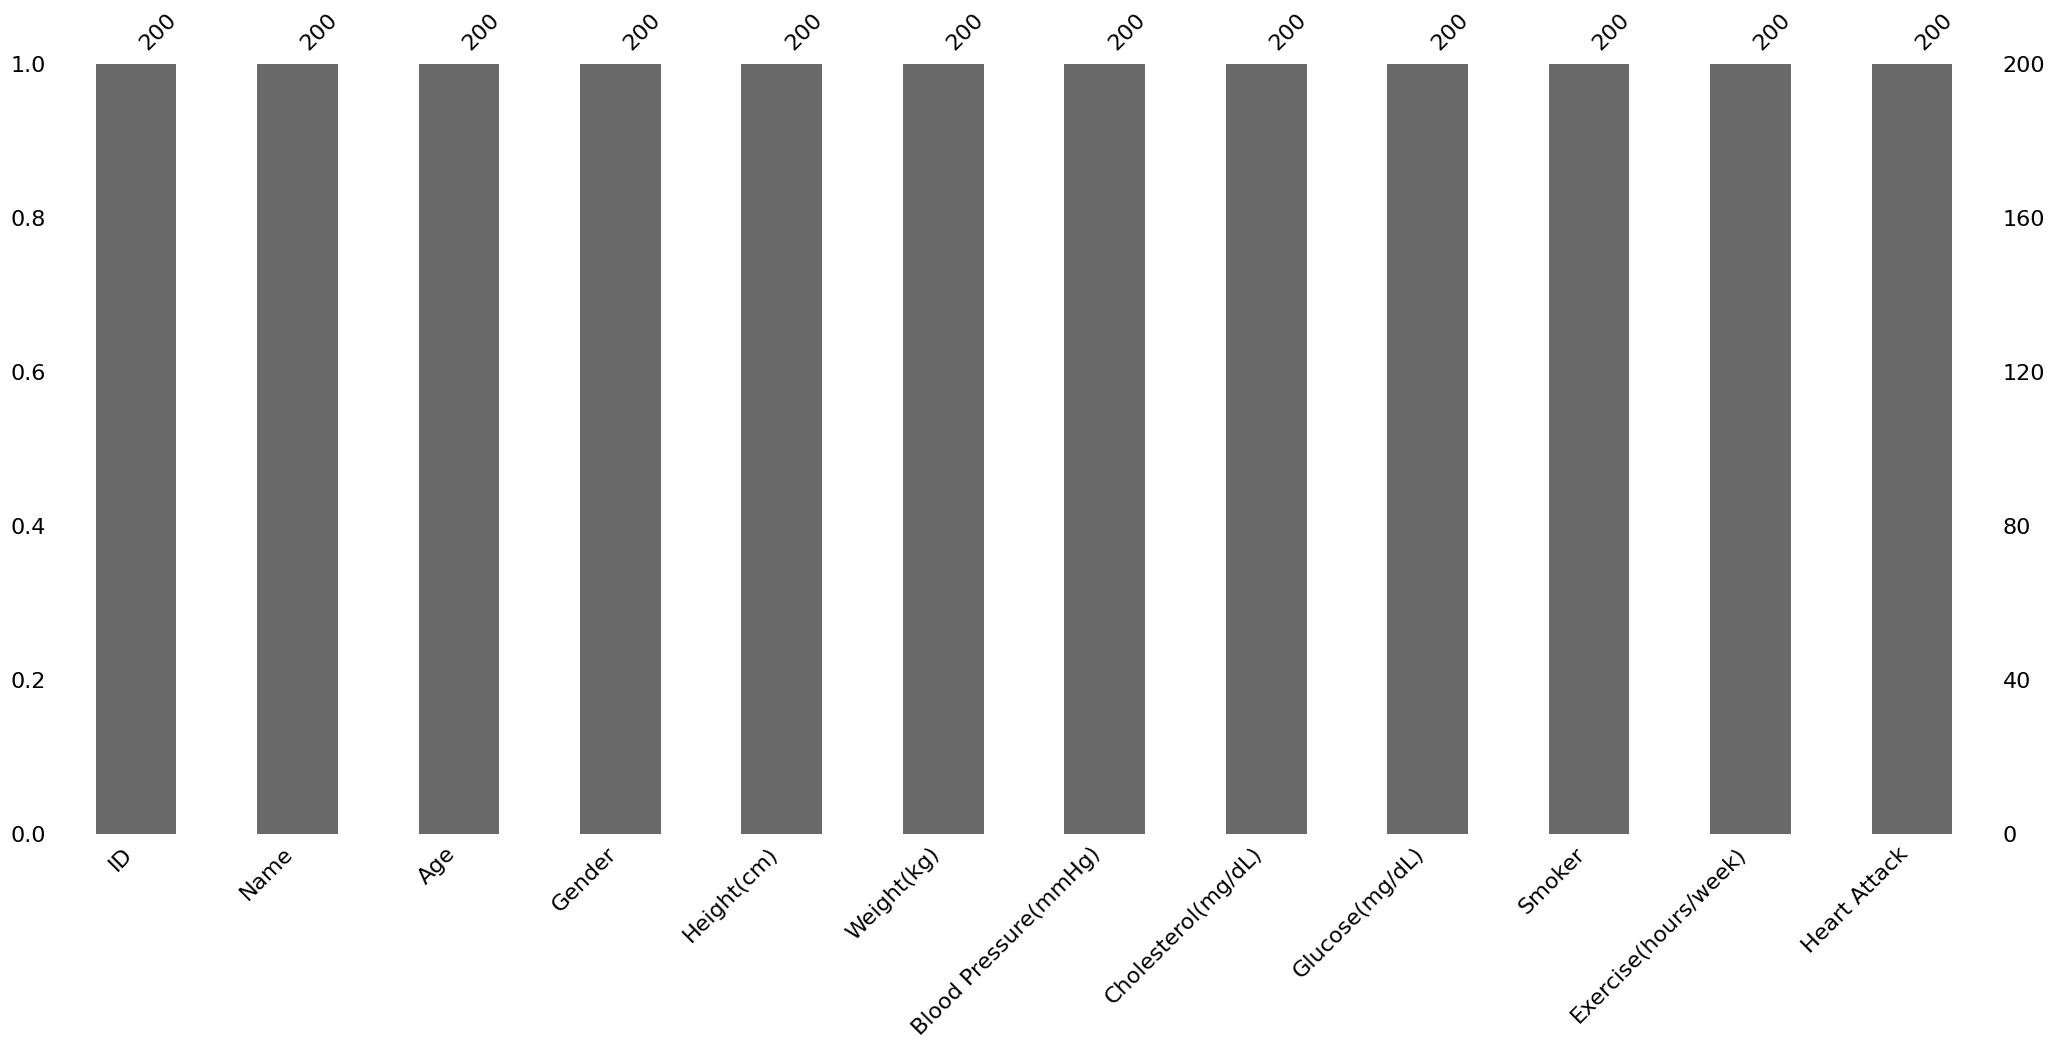

In [65]:
msno.bar(df.sample(200))

In [66]:
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1


Data Preprocessing

In [87]:
for col in categorical_df_list.columns:
    print(df[col].value_counts())

Name
David Kim              38
Elizabeth Rodriguez    38
Matthew Martinez       38
Rebecca Smith          37
Christopher Johnson    37
                       ..
Matthew Johnson         1
Jennifer Brown          1
Jason Wilson            1
Jessica Johnson         1
John Doe                1
Name: count, Length: 121, dtype: int64
Gender
Male      362
Female    362
Name: count, dtype: int64
Blood Pressure(mmHg)
125/80    86
122/80    76
125/78    67
122/78    44
118/72    41
119/75    39
121/77    39
124/79    38
118/76    34
120/75    34
121/78    33
124/80    33
116/73    32
120/78    21
123/80    17
132/84    10
110/70    10
126/82     7
133/85     7
112/72     6
113/71     5
124/78     5
128/82     5
116/74     5
109/69     4
130/82     4
115/75     4
130/83     3
123/78     3
117/73     2
108/68     1
115/70     1
123/79     1
119/78     1
135/85     1
105/65     1
118/75     1
117/74     1
130/85     1
120/80     1
Name: count, dtype: int64
Smoker
No     376
Yes    348
Name: count, 

In [88]:
df['systolic'] = df['Blood Pressure(mmHg)'].apply( lambda x: int( x.split('/')[0]) )
df['diastolic'] = df['Blood Pressure(mmHg)'].apply( lambda x: int( x.split('/')[1])  )
df.head()

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,systolic,diastolic
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0,120,80
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0,110,70
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1,130,85
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0,115,75
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1,125,80


In [89]:
numerical_df_list = df.select_dtypes(include='number')
categorical_df_list = df.select_dtypes(include=['object'])

In [90]:
numerical_df_list_col = numerical_df_list.columns.drop(['ID','Heart Attack'])
categorical_df_list_col = categorical_df_list.columns

Univariate Analysis

In [91]:
numerical_df_list

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,systolic,diastolic
0,1,45,175,80,200,90,3,0,120,80
1,2,35,160,65,180,80,2,0,110,70
2,3,55,180,85,220,95,4,1,130,85
3,4,40,165,70,190,85,3,0,115,75
4,5,50,170,75,210,92,2,1,125,80
...,...,...,...,...,...,...,...,...,...,...
719,710,39,166,68,195,88,3,0,118,76
720,711,56,179,83,220,100,2,1,123,80
721,712,43,167,70,200,92,2,0,120,78
722,713,53,182,86,225,98,2,1,125,78


Numeric Analysis

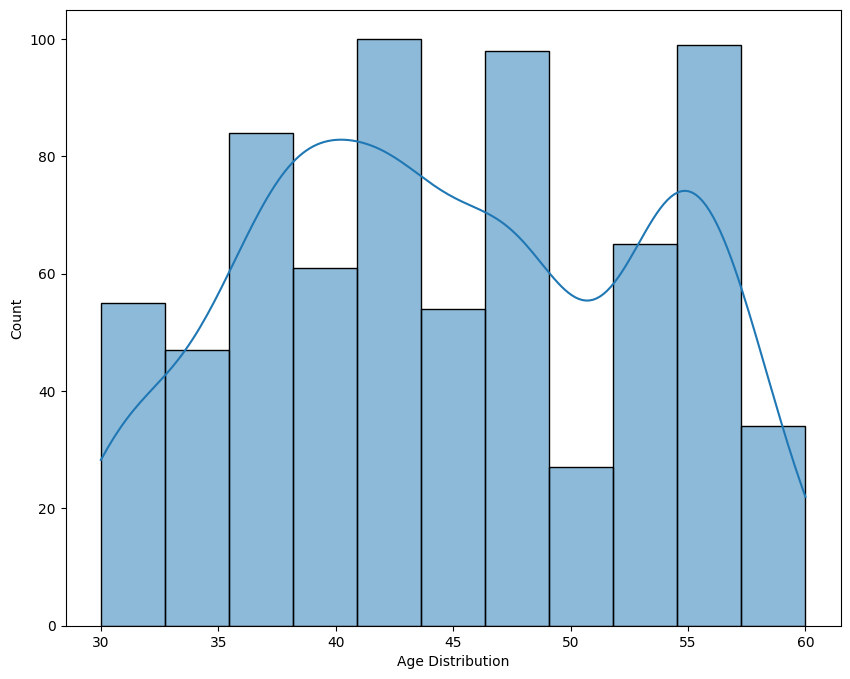

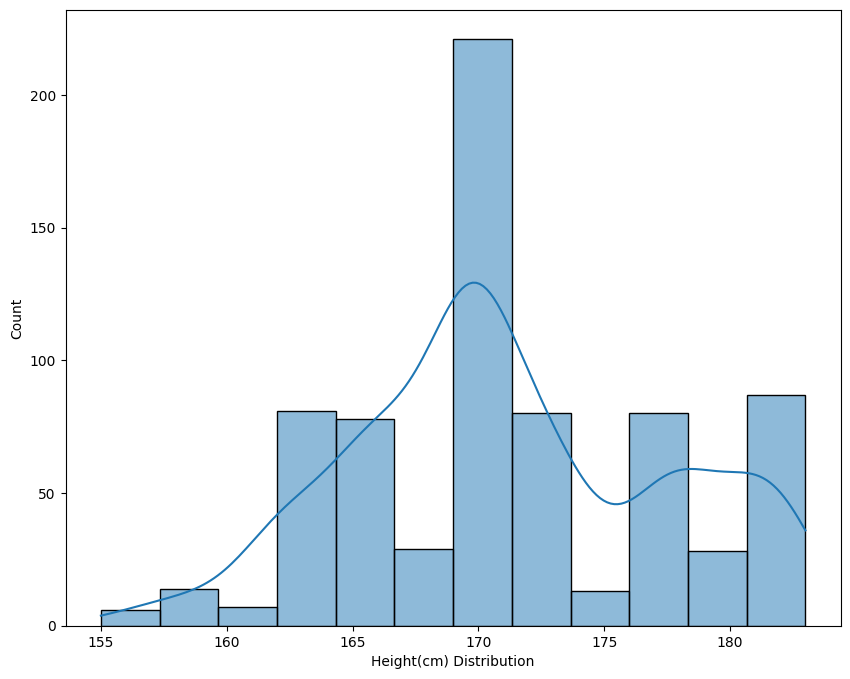

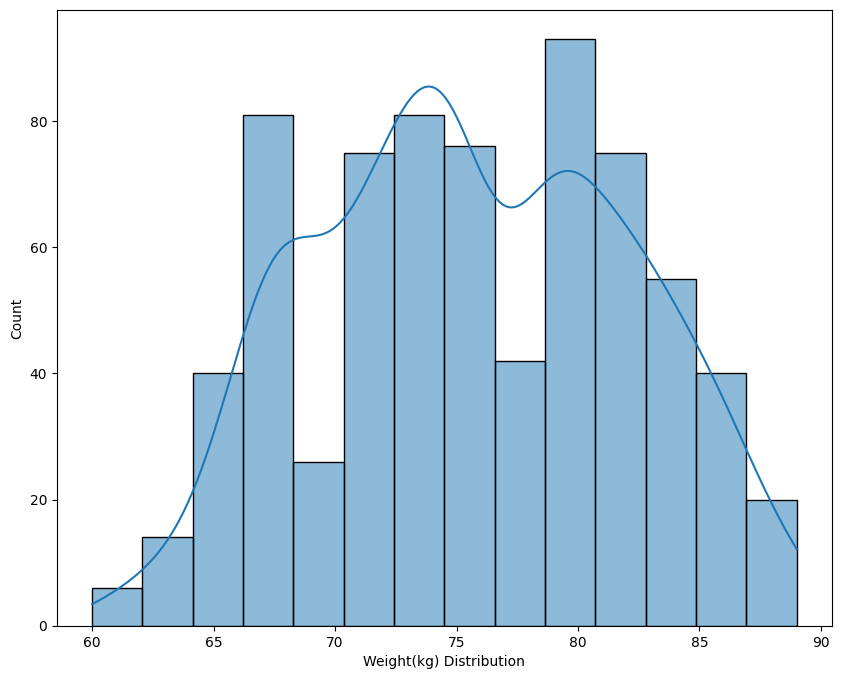

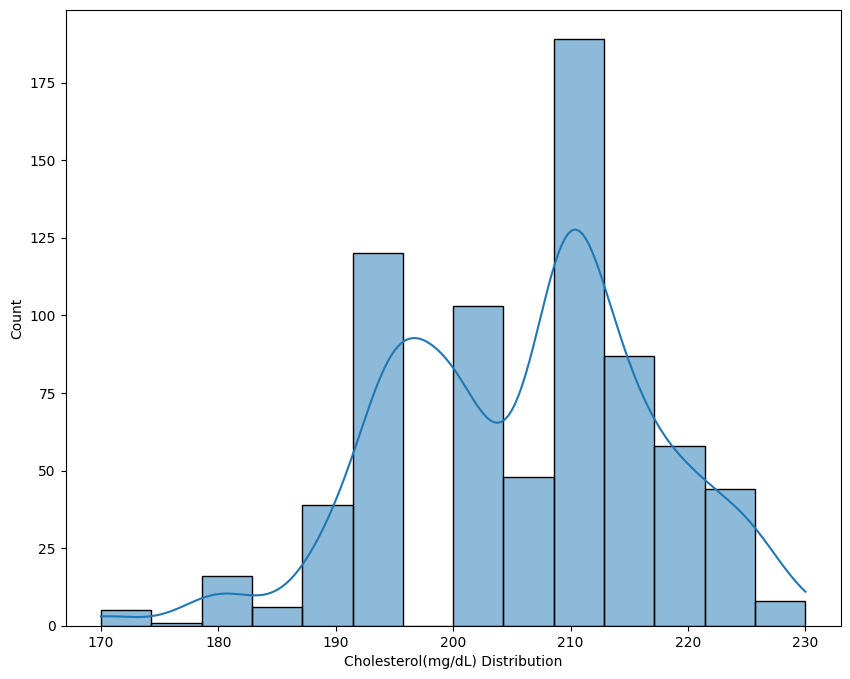

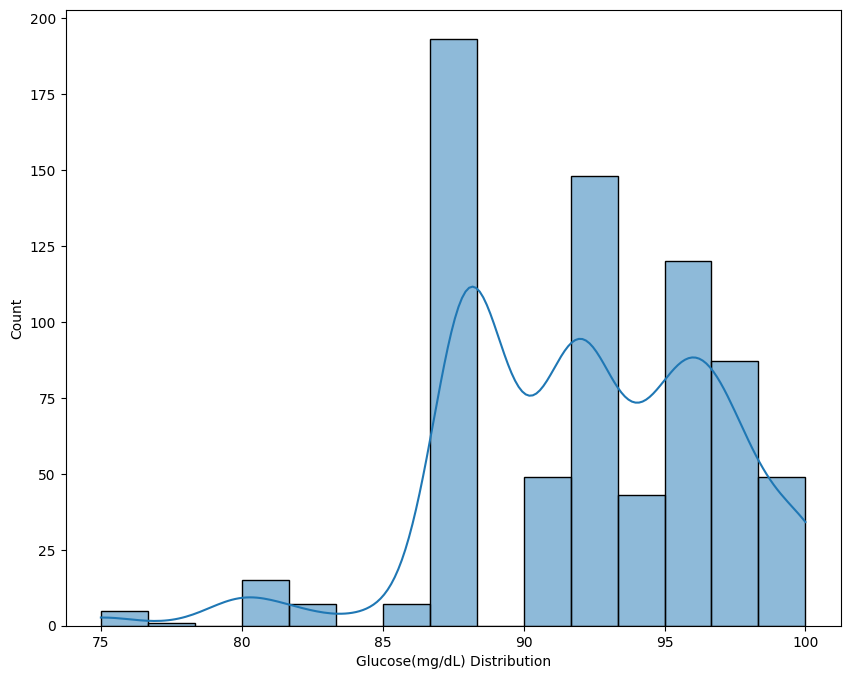

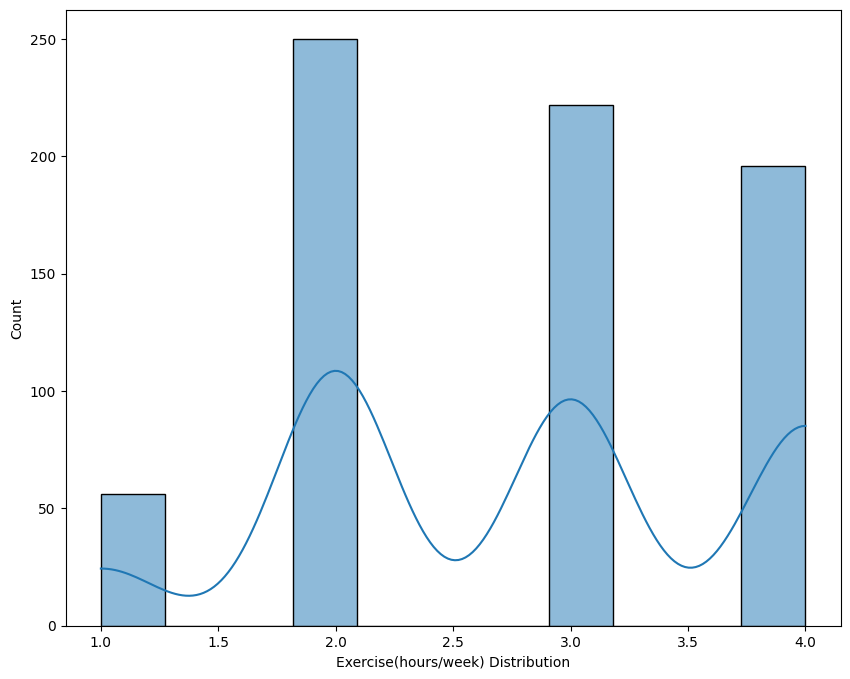

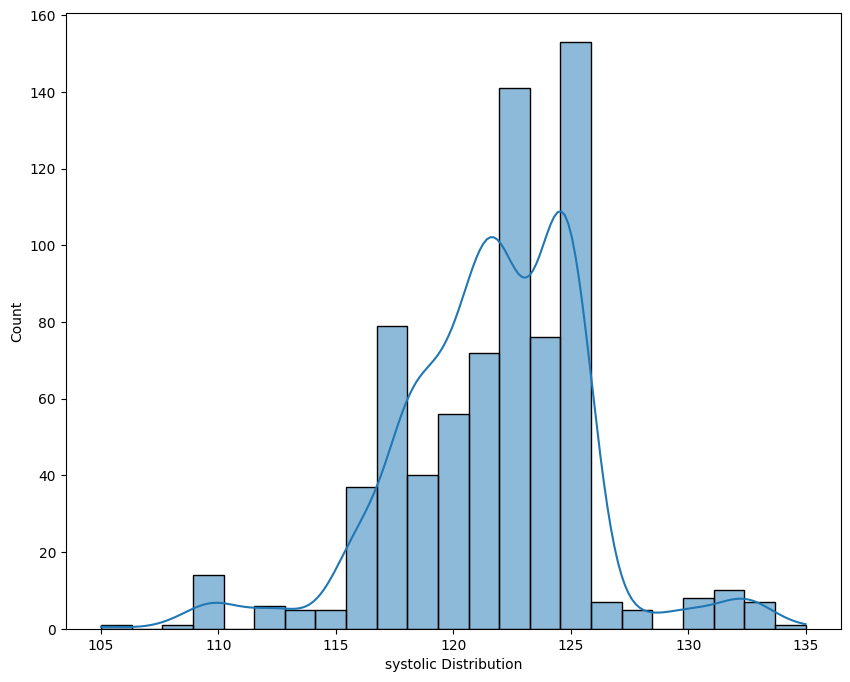

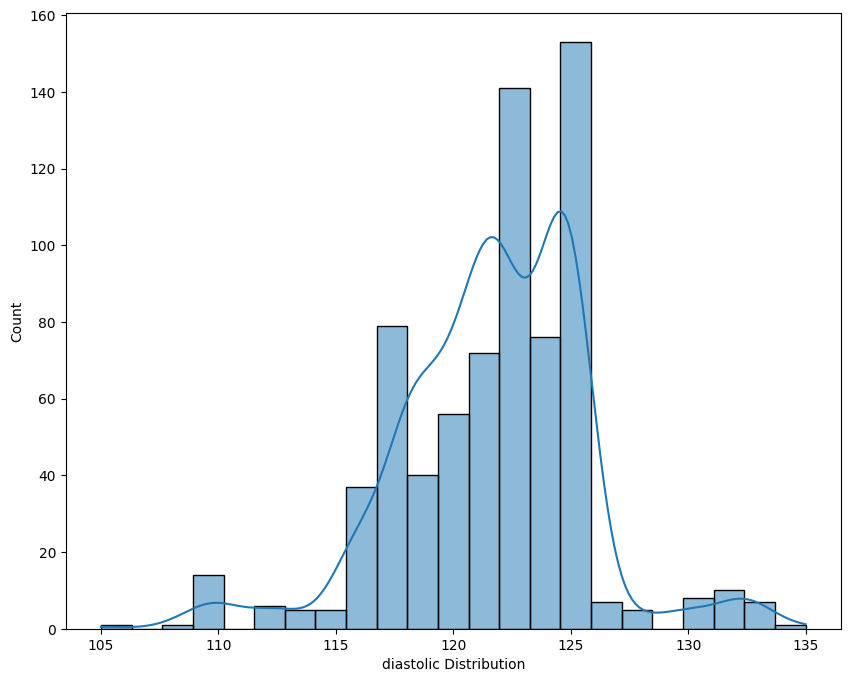

In [72]:

for col in numerical_df_list_col:
    plt.figure(figsize=(10,8))
    sns.histplot(numerical_df_list[col],kde=True)
    plt.xlabel("{} Distribution".format(col))
    plt.show()

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/3042776833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= categorical_df_list[col], palette='Set2')


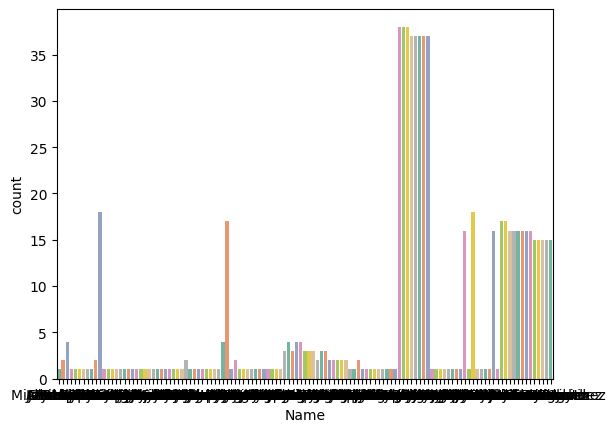

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/3042776833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= categorical_df_list[col], palette='Set2')


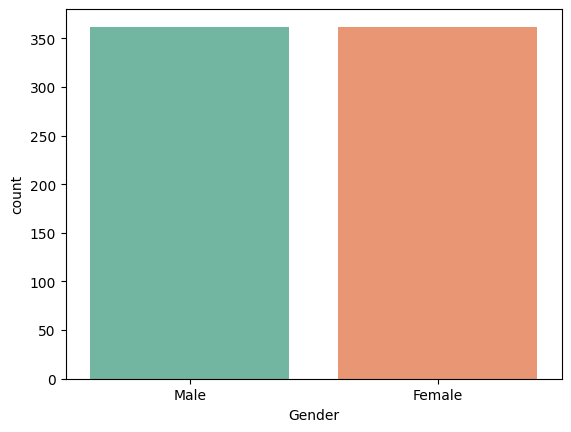

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/3042776833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= categorical_df_list[col], palette='Set2')


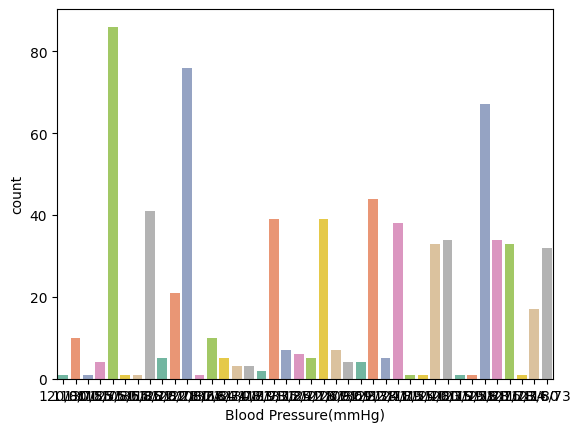

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/3042776833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= categorical_df_list[col], palette='Set2')


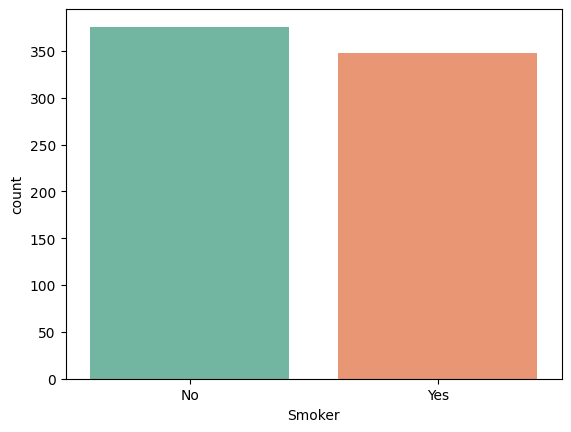

In [73]:
for col in categorical_df_list.columns:
    sns.countplot(x= categorical_df_list[col], palette='Set2')
    plt.show()


Bivariate Analysis

In [74]:
numerical_df_list.drop(['ID'], axis=1, inplace=True)

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


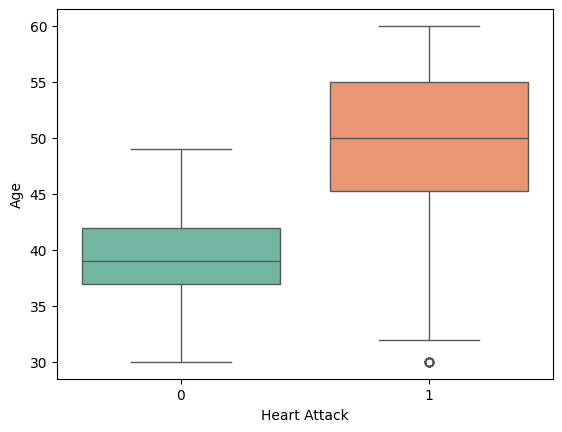

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


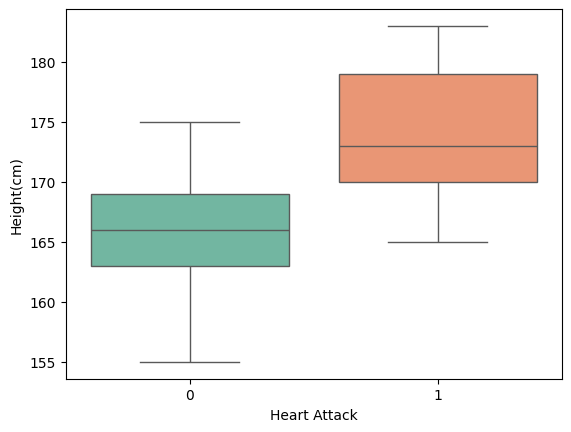

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


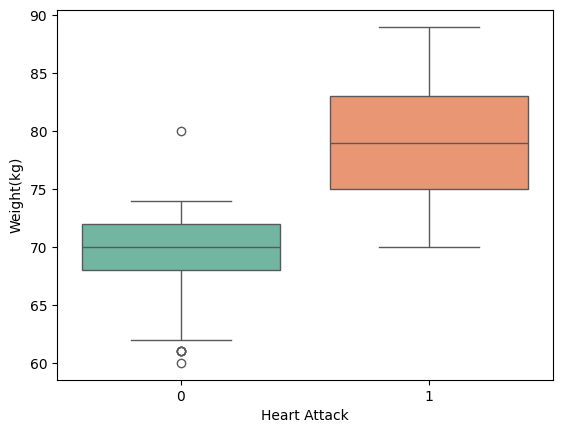

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


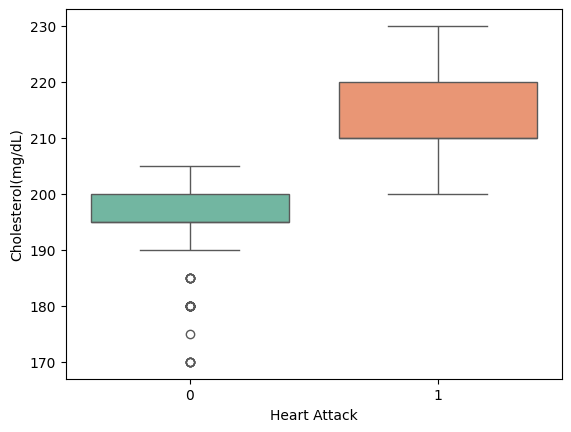

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


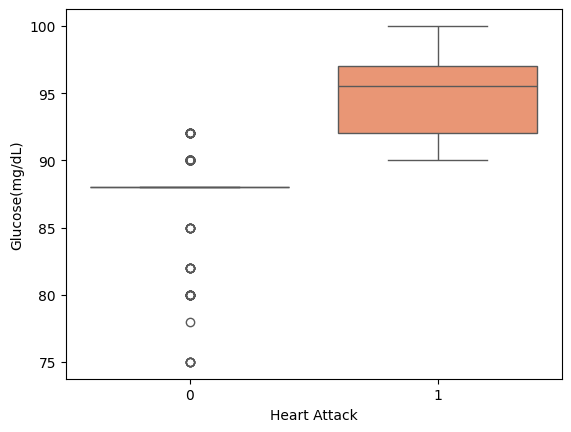

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


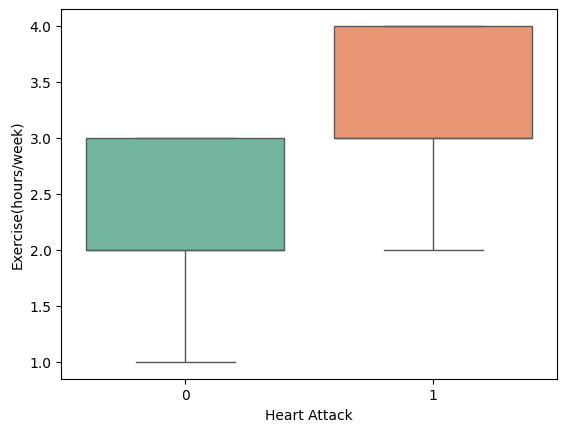

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


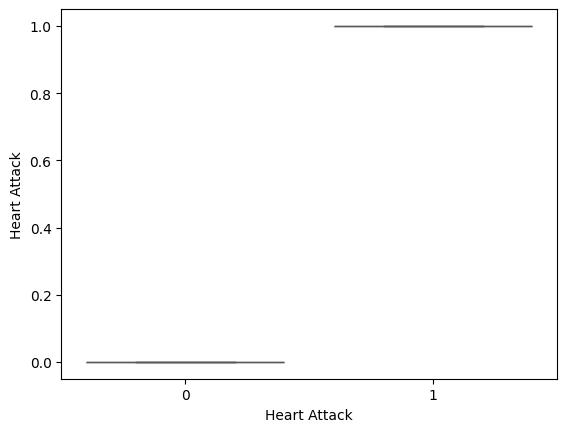

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


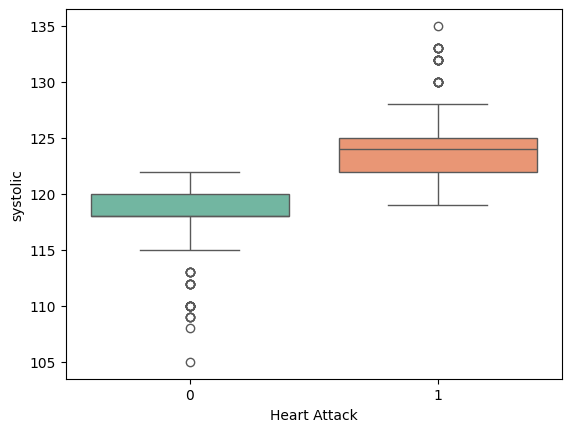

/var/folders/8m/18pb0v591913gj28zbj8vkb40000gn/T/ipykernel_49974/1061524752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')


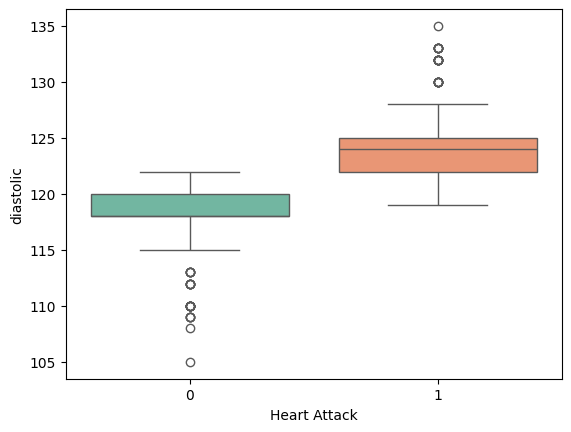

In [75]:
for col in numerical_df_list.columns:
    sns.boxplot(x='Heart Attack', y=col, data=numerical_df_list, palette='Set2')
    plt.show()

In [76]:
categorical_df_list['Heart Attack'] = df['Heart Attack']
for col in categorical_df_list.columns:
    print(df.groupby([col])['Heart Attack'].mean())

Name
Aaron Taylor        1.0
Amanda Johnson      0.0
Amanda Martinez     0.0
Amanda Thomas       0.0
Amy Johnson         0.0
                   ... 
Stephanie Wilson    0.0
Susan Taylor        1.0
William Anderson    1.0
William Lee         1.0
William Nguyen      1.0
Name: Heart Attack, Length: 121, dtype: float64
Gender
Female    0.320442
Male      0.878453
Name: Heart Attack, dtype: float64
Blood Pressure(mmHg)
105/65    0.000000
108/68    0.000000
109/69    0.000000
110/70    0.000000
112/72    0.000000
113/71    0.000000
115/70    0.000000
115/75    0.000000
116/73    0.000000
116/74    0.000000
117/73    0.000000
117/74    0.000000
118/72    0.000000
118/75    0.000000
118/76    0.000000
119/75    0.000000
119/78    1.000000
120/75    0.029412
120/78    0.000000
120/80    0.000000
121/77    0.846154
121/78    1.000000
122/78    0.045455
122/80    1.000000
123/78    1.000000
123/79    1.000000
123/80    1.000000
124/78    1.000000
124/79    1.000000
124/80    1.000000
125/78    1.

Correlation
1. Numeric variables - we use Pearson correlation
2. Categorical variables - we use chi-square
3. Numeric-Categorical - we use ANOVA

Numeric Feature Correlation

In [77]:
corr = numerical_df_list.corr()
corr

,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,systolic,diastolic
Age,1.000000,0.776136,0.775322,0.757625,0.761373,0.181223,0.613504,0.582720,0.582720
Height(cm),0.776136,1.000000,0.976036,0.904723,0.896842,0.423971,0.762275,0.803423,0.803423
Weight(kg),0.775322,0.976036,1.000000,0.934489,0.883239,0.420311,0.796367,0.837322,0.837322
Cholesterol(mg/dL),0.757625,0.904723,0.934489,1.000000,0.928702,0.401949,0.827110,0.870475,0.870475
Glucose(mg/dL),0.761373,0.896842,0.883239,0.928702,1.000000,0.375608,0.792525,0.746116,0.746116
Exercise(hours/week),0.181223,0.423971,0.420311,0.401949,0.375608,1.000000,0.604951,0.548476,0.548476
Heart Attack,0.613504,0.762275,0.796367,0.827110,0.792525,0.604951,1.000000,0.718704,0.718704
systolic,0.582720,0.803423,0.837322,0.870475,0.746116,0.548476,0.718704,1.000000,1.000000
diastolic,0.582720,0.803423,0.837322,0.870475,0.746116,0.548476,0.718704,1.000000,1.000000


<Axes: >

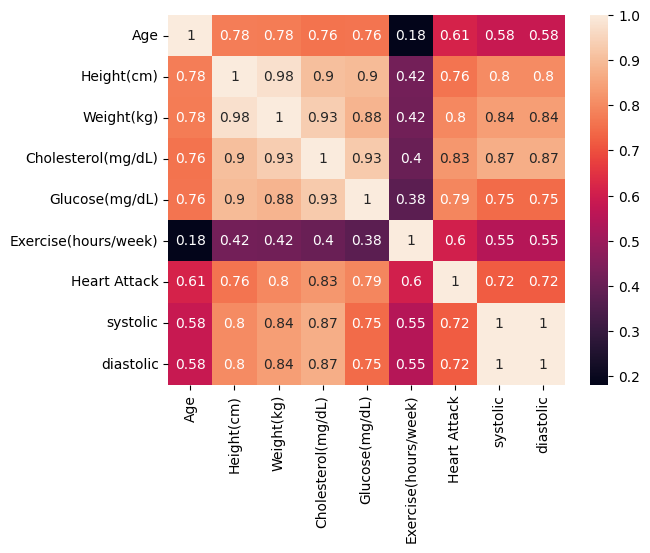

In [78]:
sns.heatmap(corr, annot=True)

In [79]:
corr[corr['Heart Attack'] > 0.7]['Heart Attack'].sort_values(ascending=False)

Heart Attack          1.000000
Cholesterol(mg/dL)    0.827110
Weight(kg)            0.796367
Glucose(mg/dL)        0.792525
Height(cm)            0.762275
systolic              0.718704
diastolic             0.718704
Name: Heart Attack, dtype: float64

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(n_components=2)

In [82]:
X = pca.fit_transform(numerical_df_list)
pca.explained_variance_ratio_

array([0.87213488, 0.07559   ])

Categorical features Correlation

In [83]:
from scipy import stats

In [84]:
categorical_df_list.columns

Index(['Name', 'Gender', 'Blood Pressure(mmHg)', 'Smoker', 'Heart Attack'], dtype='object')

In [85]:
lists = []
for col in categorical_df_list.columns:
    contingency = pd.crosstab(categorical_df_list[col],df['Heart Attack'])
    val = stats.chi2_contingency(contingency)
    lists.append({
        'column1': col,
        'column2': 'Heart Attack',
        'f-statistic': val.statistic,
        'pvalue': val.pvalue,
        'dof': val.dof
    })
lists = pd.DataFrame(lists)
lists

,column1,column2,f-statistic,pvalue,dof
0,Name,Heart Attack,683.478558,1.029161e-79,120
1,Gender,Heart Attack,232.403655,1.783024e-52,1
2,Blood Pressure(mmHg),Heart Attack,690.862705,3.324541e-120,39
3,Smoker,Heart Attack,0.551545,4.576871e-01,1
4,Heart Attack,Heart Attack,719.841235,1.449380e-158,1


In [86]:
corr_list = lists[lists['pvalue'] < 0.05]
corr_list

,column1,column2,f-statistic,pvalue,dof
0,Name,Heart Attack,683.478558,1.029161e-79,120
1,Gender,Heart Attack,232.403655,1.783024e-52,1
2,Blood Pressure(mmHg),Heart Attack,690.862705,3.324541e-120,39
4,Heart Attack,Heart Attack,719.841235,1.449380e-158,1


In [92]:
numerical_df_list

,ID,Age,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,systolic,diastolic
0,1,45,175,80,200,90,3,0,120,80
1,2,35,160,65,180,80,2,0,110,70
2,3,55,180,85,220,95,4,1,130,85
3,4,40,165,70,190,85,3,0,115,75
4,5,50,170,75,210,92,2,1,125,80
...,...,...,...,...,...,...,...,...,...,...
719,710,39,166,68,195,88,3,0,118,76
720,711,56,179,83,220,100,2,1,123,80
721,712,43,167,70,200,92,2,0,120,78
722,713,53,182,86,225,98,2,1,125,78


In [93]:
categorical_df_list

,Name,Gender,Blood Pressure(mmHg),Smoker
0,John Doe,Male,120/80,No
1,Jane Smith,Female,110/70,No
2,Michael Johnson,Male,130/85,Yes
3,Sarah Brown,Female,115/75,No
4,David Lee,Male,125/80,Yes
...,...,...,...,...
719,Ashley Martinez,Female,118/76,No
720,James Rodriguez,Male,123/80,No
721,Mary Taylor,Female,120/78,No
722,Christopher Smith,Male,125/78,Yes


**Categorical Encoding**

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_cat'] = le.fit_transform(df['Gender'])
df['smoker_cat'] = le.fit_transform(df['Smoker'])

In [99]:
df_new = df.drop(['ID','Name','Gender','Smoker'], axis=1)

In [100]:
df_new.head()

,Age,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Exercise(hours/week),Heart Attack,systolic,diastolic,gender_cat,smoker_cat
0,45,175,80,120/80,200,90,3,0,120,80,1,0
1,35,160,65,110/70,180,80,2,0,110,70,0,0
2,55,180,85,130/85,220,95,4,1,130,85,1,1
3,40,165,70,115/75,190,85,3,0,115,75,0,0
4,50,170,75,125/80,210,92,2,1,125,80,1,1


In [102]:
df_new.to_csv('cleaned_heart_data.csv')